Linear Regression model on california house prices prediction
-shashwat harsh

importing all the necessary libraries

In [346]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


importing data_refineset

In [347]:
data=pd.read_csv("D:\python\Datasets\housing.csv")

In [348]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [349]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [350]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

the data has multiple null values that needs to be removed

In [351]:
data=data.dropna(axis=0)


In [352]:
data.isnull().sum()     #no null values

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [353]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


C:\Users\shash\AppData\Local\Temp\ipykernel_20748\93416918.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,cmap="YlGnBu")


<Axes: >

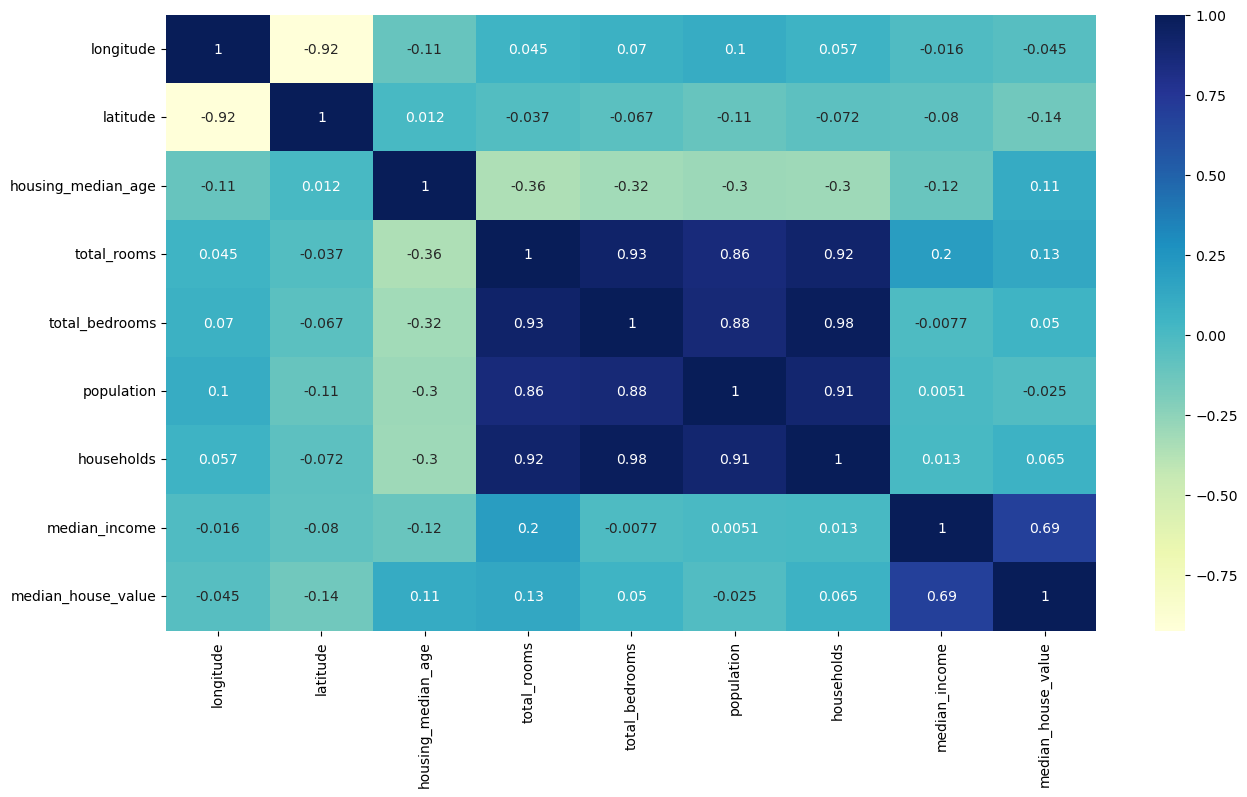

In [354]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True,cmap="YlGnBu")


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

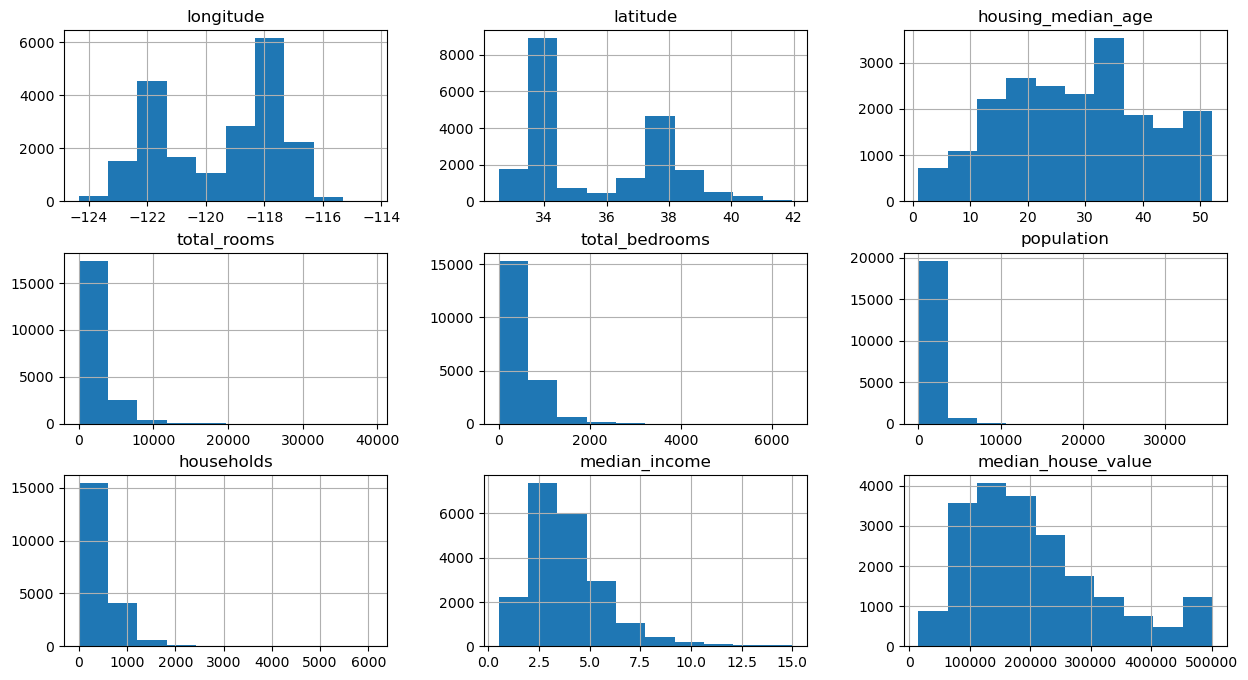

In [355]:
data.hist(figsize=(15,8))

since the hist of some features are skewed i.e. not a gaussian bell curve, log of such data is taken 
+1 is done to prevent 0 values

In [356]:
data['total_rooms']=np.log(data['total_rooms']+1)
data['total_bedrooms']=np.log(data['total_bedrooms']+1)
data['population']=np.log(data['population']+1)
data['households']=np.log(data['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

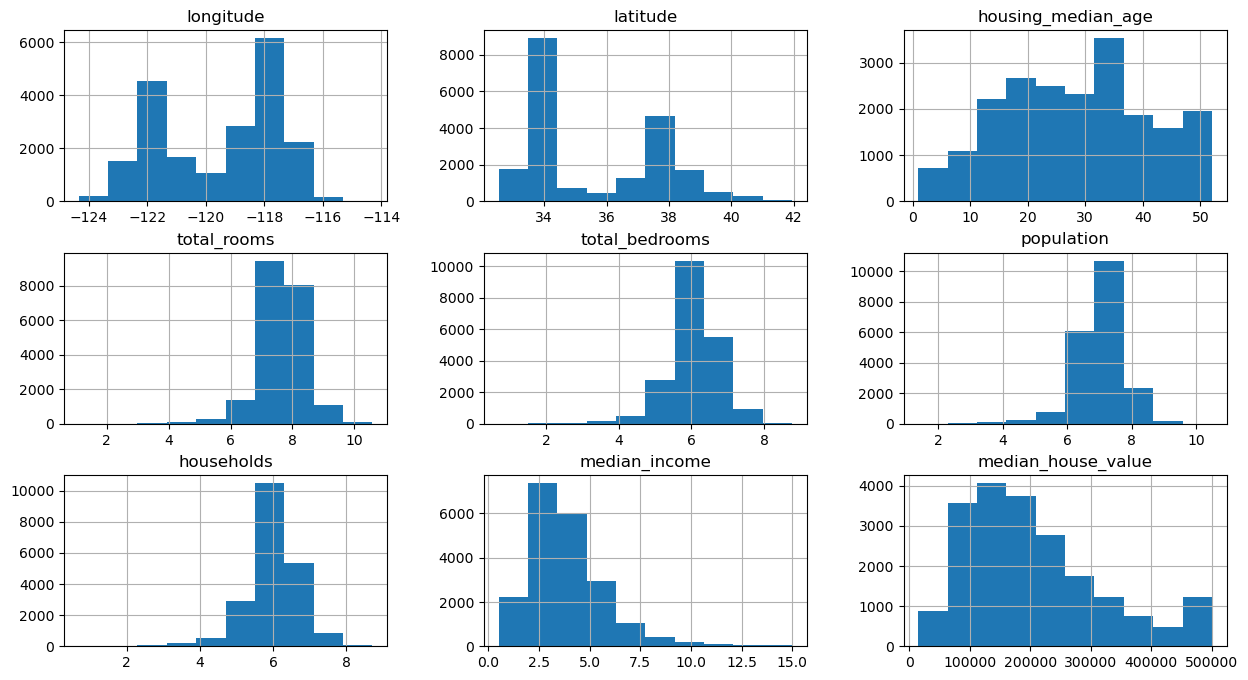

In [357]:
data.hist(figsize=(15,8))

converting ocean_proximity feature into a numerical value/binary feature

In [358]:
data.ocean_proximity.value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

In [359]:
data=data.join(pd.get_dummies(data.ocean_proximity))
data=data.drop(['ocean_proximity'],axis=1)

In [360]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,7.418181,5.926926,6.740519,5.802118,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,6.548219,5.017280,5.877736,4.744932,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,7.720905,6.186209,6.915723,6.073045,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,7.528869,6.016157,6.609349,5.857933,1.8672,84700.0,0,1,0,0,0


<Axes: >

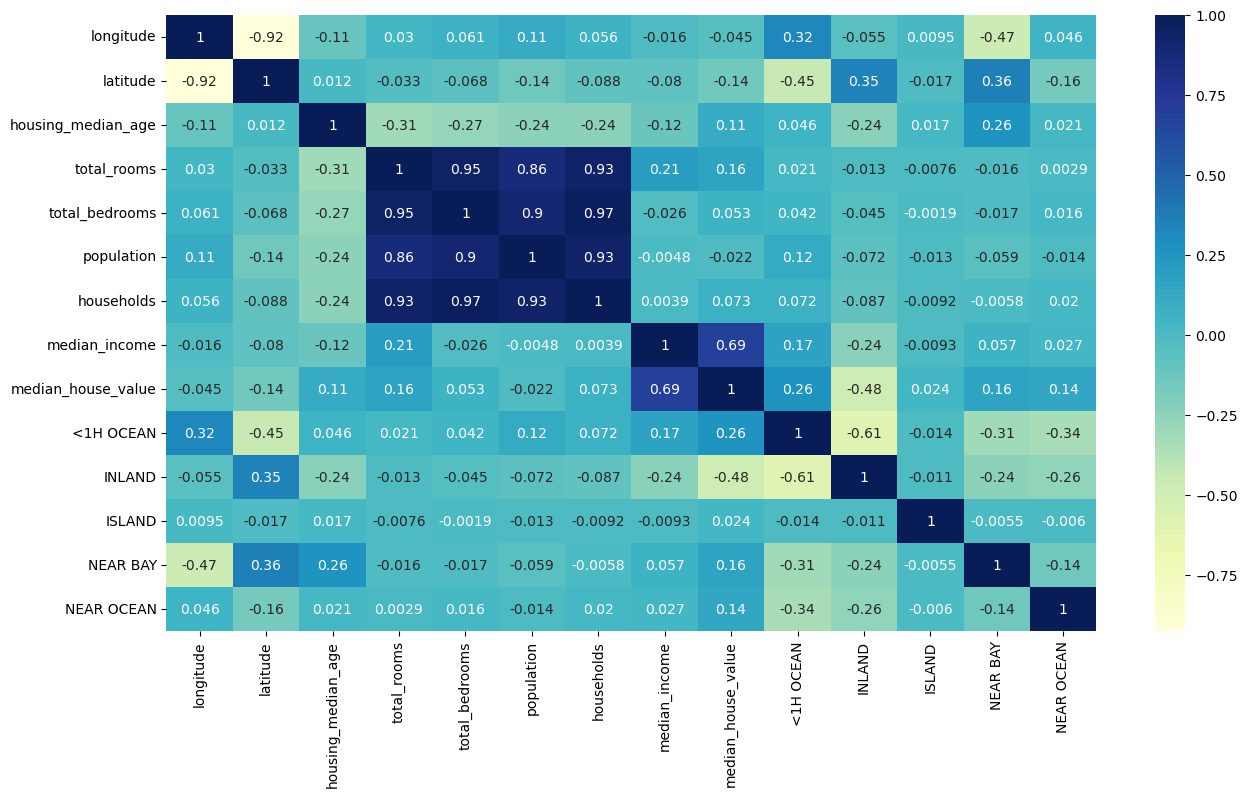

In [361]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True,cmap="YlGnBu")

<Axes: >

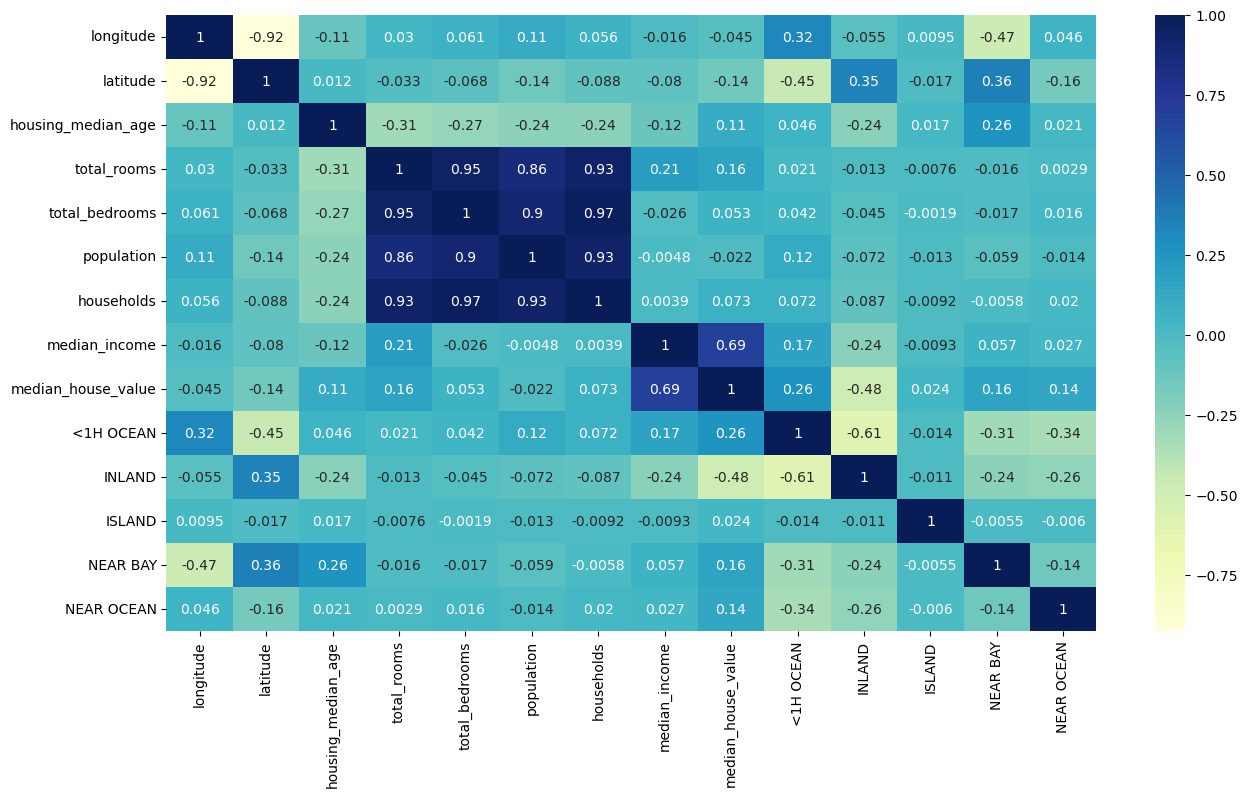

In [362]:
data.corr() #correlation matrix
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True,cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

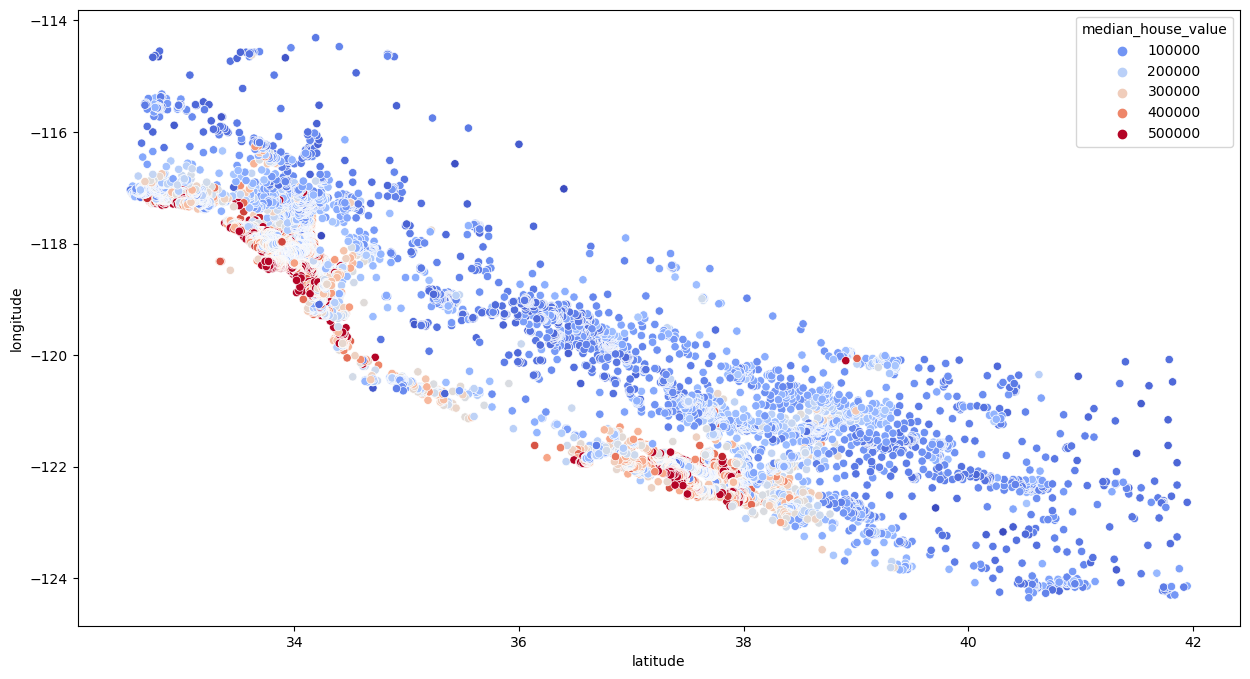

In [363]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude',y='longitude',data=data,hue='median_house_value',palette='coolwarm')

adding new features (features close to zero correlation should be dropped but not done so )

In [364]:
data['bedroom_ratio']=data['total_bedrooms'] / data['total_rooms'] #ratio of no of bedrooms:rooms
data['household_rooms']=data['total_rooms']/ data['households']     #ratio of no of rooms:households

<Axes: >

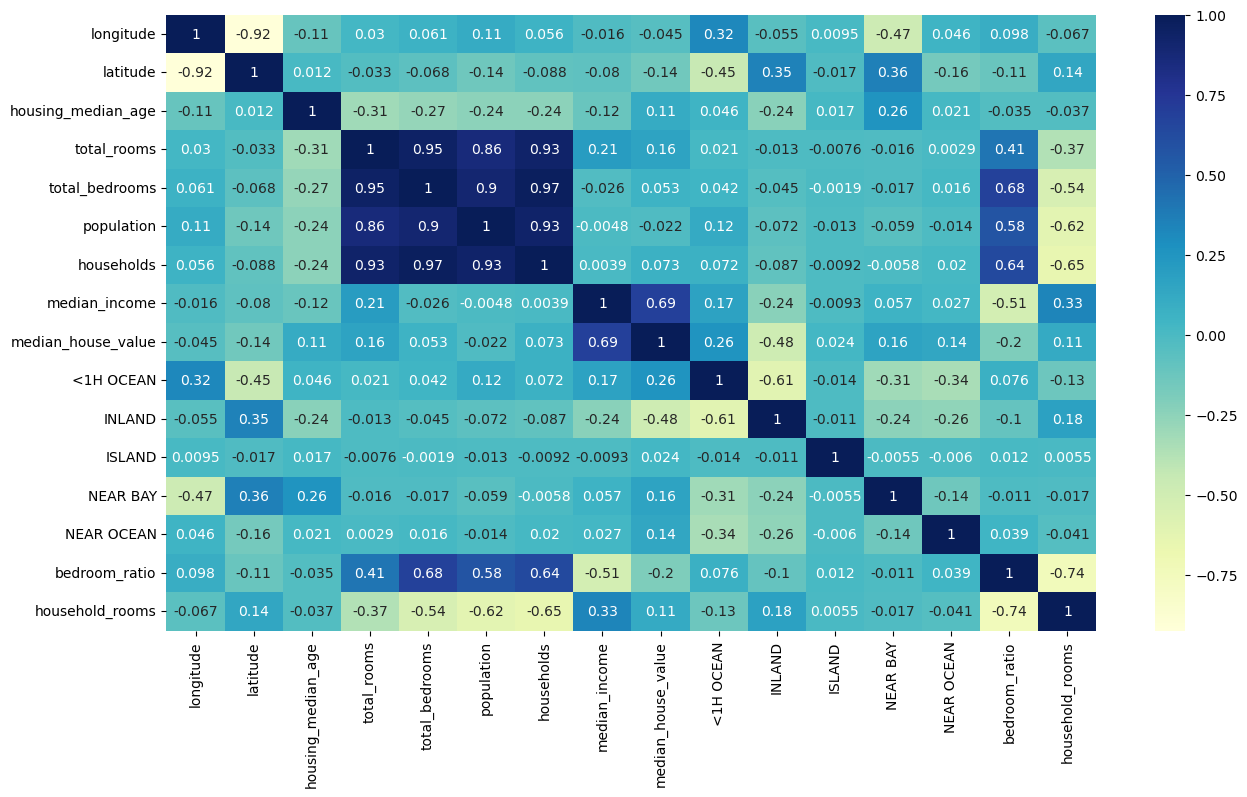

In [365]:
data.corr() #correlation matrix
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True,cmap="YlGnBu")

In [366]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,8.3252,452600.0,0,0,0,1,0,0.717813,1.399834
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,8.3014,358500.0,0,0,0,1,0,0.790429,1.260013
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,7.2574,352100.0,0,0,0,1,0,0.720313,1.407171
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,5.6431,341300.0,0,0,0,1,0,0.764097,1.325768
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,3.8462,342200.0,0,0,0,1,0,0.762444,1.329892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,7.418181,5.926926,6.740519,5.802118,1.5603,78100.0,0,1,0,0,0,0.798973,1.278530
20636,-121.21,39.49,18.0,6.548219,5.017280,5.877736,4.744932,2.5568,77100.0,0,1,0,0,0,0.766205,1.380045
20637,-121.22,39.43,17.0,7.720905,6.186209,6.915723,6.073045,1.7000,92300.0,0,1,0,0,0,0.801228,1.271340
20638,-121.32,39.43,18.0,7.528869,6.016157,6.609349,5.857933,1.8672,84700.0,0,1,0,0,0,0.799078,1.285243


selecting x and y and splitting it into training data(80%) and testing data (20%)

In [367]:
x=data.drop(['median_house_value'],axis=1)
y=data['median_house_value']

In [368]:
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,8.3252,0,0,0,1,0,0.717813,1.399834
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,8.3014,0,0,0,1,0,0.790429,1.260013
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,7.2574,0,0,0,1,0,0.720313,1.407171
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,5.6431,0,0,0,1,0,0.764097,1.325768
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,3.8462,0,0,0,1,0,0.762444,1.329892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,7.418181,5.926926,6.740519,5.802118,1.5603,0,1,0,0,0,0.798973,1.278530
20636,-121.21,39.49,18.0,6.548219,5.017280,5.877736,4.744932,2.5568,0,1,0,0,0,0.766205,1.380045
20637,-121.22,39.43,17.0,7.720905,6.186209,6.915723,6.073045,1.7000,0,1,0,0,0,0.801228,1.271340
20638,-121.32,39.43,18.0,7.528869,6.016157,6.609349,5.857933,1.8672,0,1,0,0,0,0.799078,1.285243


In [369]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [370]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test= train_test_split(x,y,test_size=0.2)

Text(0, 0.5, 'House Price')

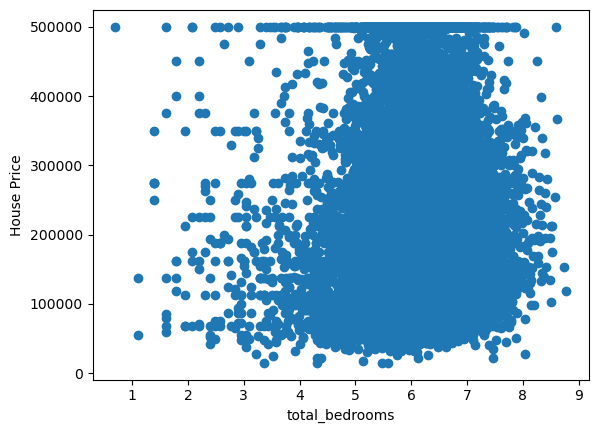

In [371]:
plt.scatter(x['total_bedrooms'], y)
plt.xlabel('total_bedrooms')
plt.ylabel('House Price')

scaling the given data


<Axes: >

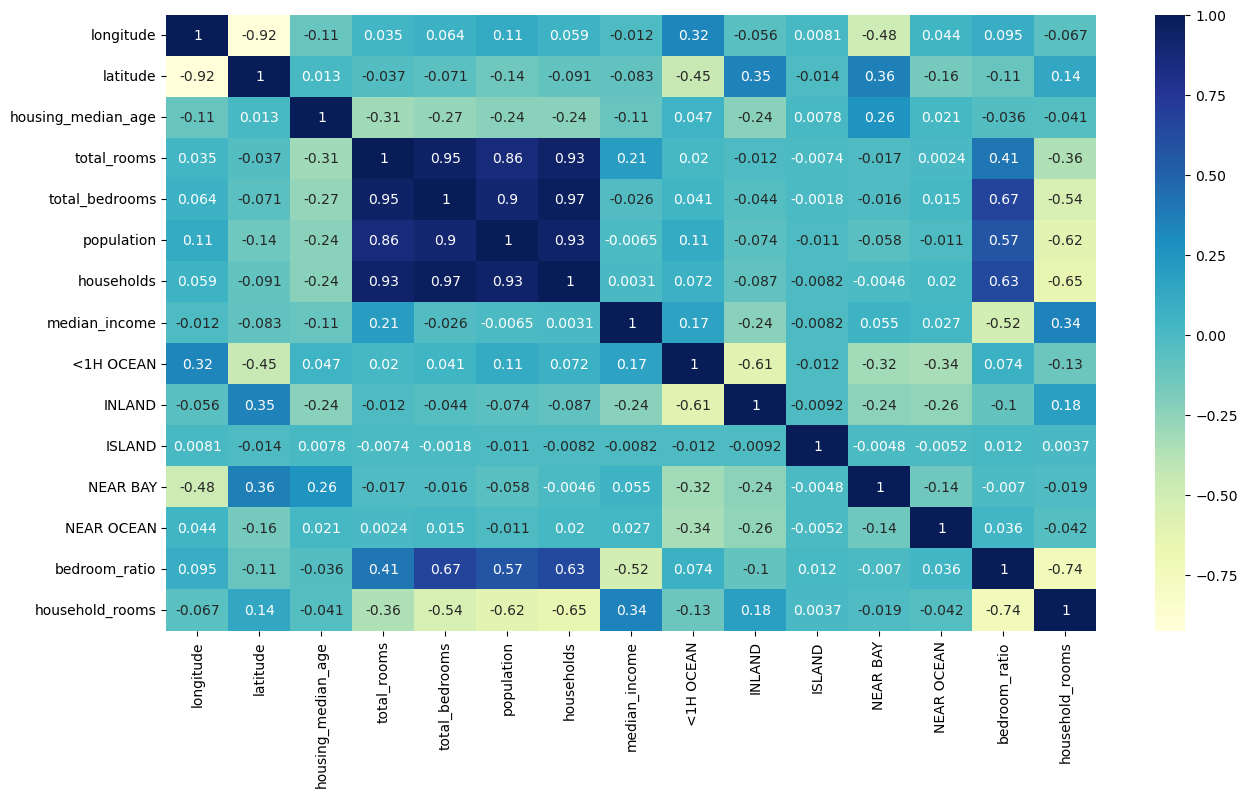

In [372]:
plt.figure(figsize=(15,8))
sns.heatmap(x_train.corr(),annot=True,cmap="YlGnBu")

from sklearn.preprocessing import StandardScaler
scale = StandardScaler ()
x_train = scale.fit_transform(x_train)
x_test = scale.fit_transform(x_test)

without scaling the training data

In [373]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [374]:
print("accuracy : ",lr.score(x_train,y_train)*100)

accuracy :  66.81714710215536


In [375]:
predict=lr.predict(x_test)

In [376]:
print("accuracy : ",lr.score(x_test,y_test)*100)

accuracy :  68.24175761026878


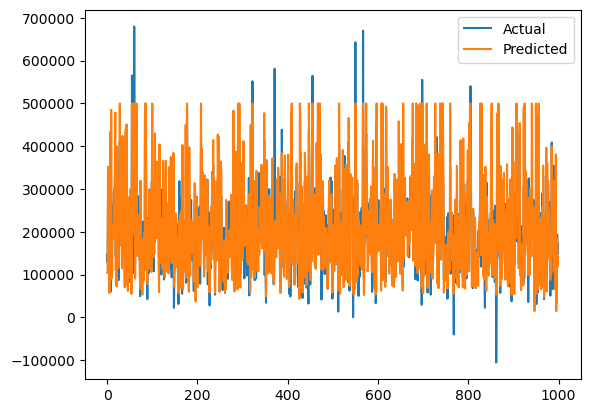

In [377]:
gr = pd.DataFrame({'Predicted':predict,'Actual':y_test})
gr = gr.reset_index()
gr = gr.drop(['index'],axis=1)
plt.plot(gr[:1000])
plt.legend(['Actual','Predicted'])

scaling the model

In [378]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler ()
xs_train = scale.fit_transform(x_train)
xs_test = scale.fit_transform(x_test)

In [379]:
lr.fit(xs_train,y_train)

LinearRegression()

In [380]:
predicts = lr.predict(xs_test)

In [381]:
print("accuracy : ",lr.score(xs_train,y_train)*100)

accuracy :  66.81714710215536


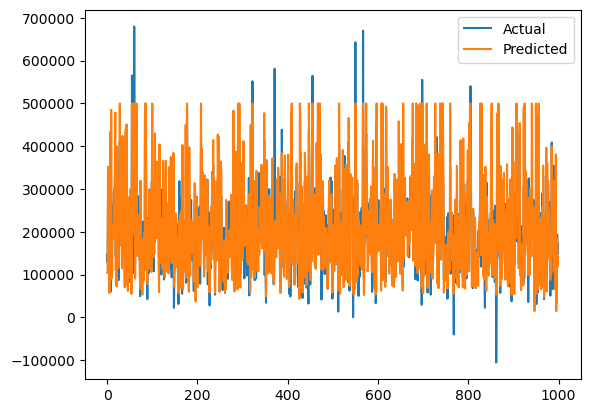

In [382]:
grs = pd.DataFrame({'Predicted':predict,'Actual':y_test})
grs = grs.reset_index()
grs = grs.drop(['index'],axis=1)
plt.plot(grs[:1000])
plt.legend(['Actual','Predicted'])